<a href="https://colab.research.google.com/github/Nattakonjpg/bsc_dpbm22/blob/main/%5Bdataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Normaliztion 
https://scikit-learn.org/stable/modules/preprocessing.html

In [93]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#ใช้ data กรมอุตุ

In [5]:
weather_data = pd.read_excel('/content/drive/MyDrive/datamining/Group4_ณัฐกรณ์_ภัทราวดี_ศศิวิมล_สุจิรา.xlsx')

In [6]:
weather_data.shape

(8169, 13)

In [ ]:
weather_data.head()

In [ ]:
data_features =weather_data.iloc[:,4:-1] # เอาคอลัมน์ 4 จนถึง คอลัมน์ก่อนสุดท้าย
data_features

In [10]:
data_features.describe()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณเมฆ
count,8113.000000,8169.000000,8169.000000,7838.000000,8169.000000,8169.000000,7838.000000
mean,2.322569,1013.111413,24.755013,3.299566,17.915204,69.305178,3.299566
std,1.311215,3.242448,2.843517,2.367818,3.819495,9.028821,2.367818
min,0.000000,1002.070000,12.000000,0.000000,1.500000,38.000000,0.000000
25%,1.000000,1011.040000,23.100000,1.000000,15.500000,63.000000,1.000000
50%,2.000000,1012.890000,25.200000,3.000000,18.200000,69.000000,3.000000
75%,3.000000,1015.120000,26.900000,5.000000,20.800000,74.000000,5.000000
max,11.000000,1025.710000,31.000000,10.000000,28.400000,99.000000,10.000000


In [11]:
data_features.dtypes #ปริมาณฝน เป็น Object เพราะอาจะมี ตัวหนังสือปนอยู่

ความเร็วลม            float64
ความกด                float64
อุณหภูมิตุ้ม          float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิจุดต่ำสุด     float64
ความชื้น                int64
ปริมาณฝน               object
ปริมาณเมฆ             float64
dtype: object

### Drop ค่า (T,-) ; แปลงให้เป็นตัวเลข

In [28]:
data_features_d= data_features[data_features['ปริมาณฝน'].eq('T')==False] #ชื่อตาราง .eq = ในตารางนี้ อันไหนเจอค่า "T" จะเลือกมาทั้งหมด , any(1) ทุกๆคอลัมน์ ; drop แล้วเหลือ 7959 row
data_features_d= data_features_d[data_features['ปริมาณฝน'].eq('-')==False] #ชื่อตาราง .eq = ในตารางนี้ อันไหนเจอค่า "-" จะเลือกมาทั้งหมด 

In [33]:
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(int)

In [36]:
data_features_d.shape # 5778, 8

(5778, 8)

In [34]:
data_features_d.describe()

,ความเร็วลม,ความกด,อุณหภูมิตุ้ม,อุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดต่ำสุด,ความชื้น,ปริมาณฝน,ปริมาณเมฆ
count,5729.000000,5778.000000,5778.000000,5558.000000,5778.000000,5778.000000,5778.000000,5558.000000
mean,2.253273,1012.970076,24.809934,3.323678,17.981014,69.410869,1.155417,3.323678
std,1.223140,3.234548,2.790382,2.447090,3.762340,9.438618,5.801644,2.447090
min,0.000000,1002.070000,12.000000,0.000000,1.500000,38.000000,0.000000,0.000000
25%,1.000000,1010.960000,23.200000,1.000000,15.600000,63.000000,0.000000,1.000000
50%,2.000000,1012.765000,25.300000,3.000000,18.100000,68.000000,0.000000,3.000000
75%,3.000000,1014.967500,26.900000,5.000000,20.800000,75.000000,0.000000,5.000000
max,10.000000,1025.710000,31.000000,10.000000,28.400000,99.000000,112.000000,10.000000


In [ ]:
import matplotlib

In [42]:
from matplotlib import pyplot as plt

(array([  26.,  139.,  467., 1275., 1798., 1190.,  590.,  228.,   54.,
          11.]),
 array([1002.07 , 1004.434, 1006.798, 1009.162, 1011.526, 1013.89 ,
        1016.254, 1018.618, 1020.982, 1023.346, 1025.71 ]),
 <a list of 10 Patch objects>)

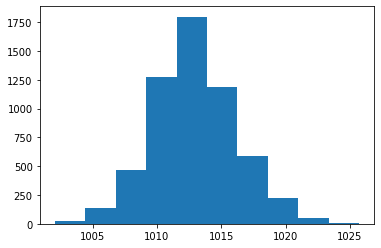

In [46]:
plt.hist(data_features_d['ความกด'])

In [43]:
from sklearn import preprocessing

In [44]:
#define
scalar = preprocessing.StandardScaler() #ใช้แบบปกติ
#train
scalar.fit(data_features_d) #สร้าง model จาก data 
#predict - transform
data_features_d_s = scalar.fit_transform(data_features_d)

In [45]:
data_features_d_s

array([[ 0.61055332, -2.31894108,  0.9999731 , ...,  1.43986191,
        -0.02679078,  2.31983008],
       [-0.20708576, -1.95409806,  0.2831634 , ...,  2.39347381,
         2.7312871 ,  2.72851547],
       [ 0.61055332, -1.69437929,  0.2831634 , ...,  1.75773255,
         0.31796896,  2.72851547],
       ...,
       [-1.02472484, -2.50754638,  0.5340468 , ..., -1.52693067,
        -0.19917065, -1.35833849],
       [-0.20708576, -2.22927627,  0.13980146, ..., -1.42097379,
        -0.19917065, -0.5409677 ],
       [ 0.61055332, -1.47176321,  0.2831634 , ..., -1.20906003,
        -0.19917065, -0.94965309]])

(array([1.080e+02, 3.620e+03, 1.167e+03, 5.440e+02, 2.040e+02, 6.000e+01,
        0.000e+00, 2.000e+01, 3.000e+00, 3.000e+00]),
 array([-1.84236392, -1.02472484, -0.20708576,  0.61055332,  1.4281924 ,
         2.24583148,  3.06347056,  3.88110964,  4.69874872,  5.5163878 ,
         6.33402688]),
 <a list of 10 Patch objects>)

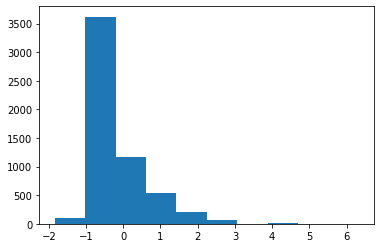

In [47]:
plt.hist(data_features_d_s[:,0])

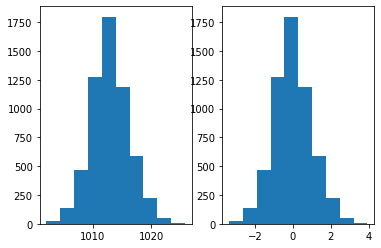

In [53]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,2,2,)
plt.hist(data_features_d_s[:,1]);

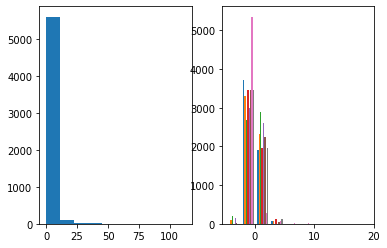

In [57]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ปริมาณฝน'])
plt.subplot(1,2,2,)
plt.hist(data_features_d_s[:-2]);

### Min-Max normalization

In [62]:
#define
scalar = preprocessing.MinMaxScaler() #ใช้แบบปกติ
#train
scalar.fit(data_features_d) #สร้าง model จาก data 
#predict - transform
data_features_d_norm = scalar.fit_transform(data_features_d)

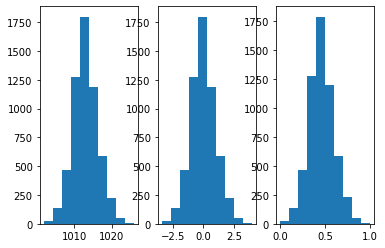

In [61]:
plt.subplot(1,3,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,1])
plt.subplot(1,3,3)
plt.hist(data_features_d_norm[:,1]);

#ใช้ Data บ้าน

In [68]:
house_data = pd.read_csv('/content/drive/MyDrive/datamining/24_ณัฐกรณ์ พวงแก้ว.csv')

In [69]:
house_data.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,1,1,1,2
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,1,1,1,1,2
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,1,1,1,1,2
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,1,1,1,2


In [70]:
house_data.isnull()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,True,True,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###ลบ Record ที่ค่า sell price เป็นค่าว่าง

In [72]:
house_data = house_data.dropna(subset=['sell_price'])

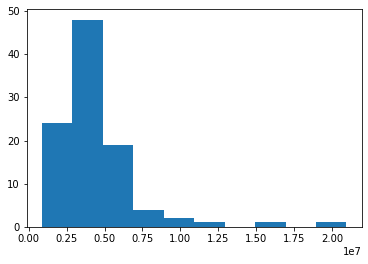

In [73]:
plt.hist(house_data['sell_price']);

### แปลงค่า sell_price
- ราคาต่ำกว่า 5m ให้เป็น 1
- ราคาระหว่างหว่าง 5m - 10m ให้เป็น 2
- ราคา 10m ขึ้นไปให้เป็น 3

In [102]:
house_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,1,1,1,2
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,1,1,1,1,2
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,1,1,1,1,2
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,0,0,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,1,1,1,1,2
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,0,0,0,0,0,0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,0,0,0,0


#One-hot-encoder

In [107]:
house_data_dummies = pd.get_dummies(house_data,columns=['zone'])

In [108]:
house_data_dummies

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,1,0,0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,0,0,0,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,0,0,0,0,0,1,0,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,0,0,0,0,0,0,0,0,1,0
